# Case study #03 - Correlation and regression 

In [4]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# reading csv file
adv_data = pd.read_csv('Dataset/Add_sales_data_2018.csv')

In [6]:
adv_data.head()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


Analysing the columns in the data set

In [7]:
adv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  205 non-null    object 
 1   Add1(in Thousands)    205 non-null    float64
 2   Add2(in Thousands)    205 non-null    float64
 3   Add3(in Thousands)    205 non-null    float64
 4   Add4(in Thousands)    205 non-null    float64
 5   Add5(in Thousands)    205 non-null    float64
 6   Profit(in Thousands)  205 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.3+ KB


Checking for null values in the dataset

In [8]:
# checking for null values in the dataset
adv_data.isna().sum()

Date                    0
Add1(in Thousands)      0
Add2(in Thousands)      0
Add3(in Thousands)      0
Add4(in Thousands)      0
Add5(in Thousands)      0
Profit(in Thousands)    0
dtype: int64

There are no null values in the dataset

In [9]:
adv_data.describe()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,267.577561,271.722439,262.990732,267.223902,267.152683,5059.630234
std,26.219588,25.914939,26.126704,26.238832,26.215360,486.910414
min,208.000000,218.600000,205.900000,210.250000,209.200000,4042.448000
25%,244.000000,248.500000,240.300000,243.050000,243.000000,4617.695000
50%,269.700000,274.200000,263.250000,268.900000,268.350000,5088.455000
75%,284.400000,288.800000,280.900000,284.500000,284.450000,5387.438000
max,327.700000,328.750000,321.650000,325.950000,325.750000,6137.800000


### 1. Relationship between Amount Spend and Profit Generated

To find the relationship between amount spend for advertising through five different companies and profit
generated, let us generate a heatmap of the correlation matrix

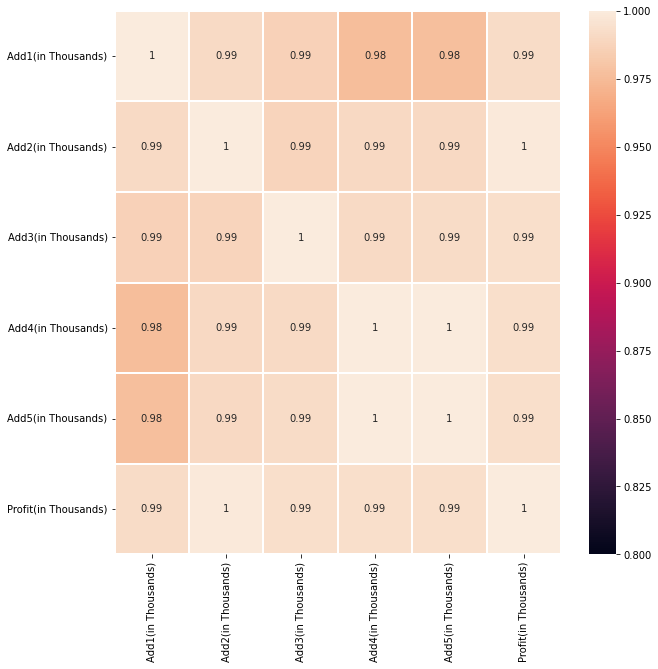

In [18]:
# finding the correlation matrix
corr_matrix = adv_data.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, vmin=0.8, vmax=1, linewidths=0.2)
plt.show()

From the above heatmap, it's visible that all amount spend by all the companies are strongly correlated with the Profit generated. All the 5 companies have a correlation value >= 0.9 with Profit generated. So as the amount spend in advertising increases, the profit also increases.

Also, there's a strong correlation between 'Add4(in Thousands)' and 'Add5(in Thousands)', so we will be dropping one of them while creating the regression model.

### 2. Regression Model to Predict Profit from the Given Data

In [63]:
adv_data.columns

Index(['Date', 'Add1(in Thousands)', 'Add2(in Thousands)',
       'Add3(in Thousands)', 'Add4(in Thousands)', 'Add5(in Thousands)',
       'Profit(in Thousands)'],
      dtype='object')

In [64]:
y = adv_data['Profit(in Thousands)']
X = adv_data.drop(['Profit(in Thousands)', 'Date', 'Add5(in Thousands)'], axis=1)

In [65]:
X.shape

(205, 4)

In [66]:
y.shape

(205,)

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

In [68]:
from sklearn import linear_model
lr = linear_model.LinearRegression()

In [69]:
model = lr.fit(X_train, y_train)

In [70]:
predictions = lr.predict(X_test)

In [71]:
print(y_test)

15     4152.066
9      4446.441
100    5131.898
132    4907.560
68     5004.282
95     4623.793
159    5384.175
162    5328.025
147    5175.051
182    5956.323
191    5780.799
164    4997.719
65     5075.858
175    5784.540
73     4936.120
152    5065.652
18     4190.965
82     5034.726
86     5015.536
143    5134.657
60     5145.131
101    5421.940
98     4569.293
30     4598.292
25     4436.321
16     4175.677
168    5616.791
195    5667.250
97     4648.834
194    5717.838
67     5001.615
120    5182.368
154    5017.503
202    5545.013
79     5013.207
69     5030.451
145    5108.626
55     4760.877
45     4606.340
84     4925.861
146    5250.788
66     5038.222
111    5491.792
153    5019.997
96     4647.356
38     4486.380
24     4435.174
139    5300.437
112    5425.190
29     4482.183
19     4193.095
178    6062.457
Name: Profit(in Thousands), dtype: float64


In [72]:
print(predictions)

[4150.88763487 4447.12592965 5133.38031159 4908.26829527 5002.14153915
 4624.18120031 5383.91839828 5328.00021054 5175.58914749 5956.55978675
 5780.89267376 4996.82977447 5076.07968284 5785.53438512 4935.74329169
 5065.84268445 4190.97345105 5034.52167751 5016.93984512 5134.84339471
 5144.92669903 5421.54918213 4569.54364815 4598.61444531 4436.038698
 4176.1770066  5617.3439695  5667.21781797 4648.70261308 5717.90555255
 5002.57699893 5182.40483872 5017.28686642 5544.93173696 5012.72424152
 5028.10954386 5108.59497872 4761.72838332 4607.60239375 4925.98150005
 5249.67337825 5037.90852212 5491.69210158 5020.81890704 4647.66638615
 4486.42826505 4436.03686862 5300.51553142 5425.05225364 4482.17658881
 4192.91620815 6063.57269524]


In [74]:
from sklearn.metrics import mean_squared_error
print('MSE is', mean_squared_error(y_test, predictions))

MSE is 0.5381640443757723


The MSE is 0.5381640443757723 which is comparatively low. So the above model is somewhat accurate.

### Predicting the Profit Generated

In [78]:
prediction_X_dataset = new_spending = pd.DataFrame({'Add1(in Thousands)': [290] ,'Add2(in Thousands)':[312],
                                                    'Add3(in Thousands)' :[309], 'Add4(in Thousands)' : [298]})

In [79]:
new_prediction = model.predict(prediction_X_dataset)
print("Predicted Profit generated =", new_prediction)

Predicted Profit generated = [5801.73669317]


So the profit will be 5801.73669317 for the given Adv spend values